# Model based on Bags of Words feature extraction

In [1]:
import essay
import pickle
import pandas as pd

In [2]:
# load the preprocessed data which we saved
# choose how much data you want to load (2467, 11142 or 89364)

# essays = pickle.load(open( "data/essays/essays2467.p", "rb"))
# nwo we want to open a csv file data/training/essays.csv

df = pd.read_csv('data/training/essays.csv', encoding='latin-1')
print(df)
print(df.TEXT)

#essays = pickle.load(open( "data/essays/essays11142.p", "rb"))

#essays = pickle.load(open( "data/essays/essays89364.p", "rb"))

# print("loaded count of essays:", len(essays))

              #AUTHID                                               TEXT cEXT  \
0     1997_504851.txt  Well, right now I just woke up from a mid-day ...    n   
1     1997_605191.txt  Well, here we go with the stream of consciousn...    n   
2     1997_687252.txt  An open keyboard and buttons to push. The thin...    n   
3     1997_568848.txt  I can't believe it!  It's really happening!  M...    y   
4     1997_688160.txt  Well, here I go with the good old stream of co...    y   
...               ...                                                ...  ...   
2462     2004_493.txt       I'm home. wanted to go to bed but remembe...    n   
2463     2004_494.txt       Stream of consiousnesssskdj. How do you s...    y   
2464     2004_497.txt  It is Wednesday, December 8th and a lot has be...    n   
2465     2004_498.txt  Man this week has been hellish. Anyways, now i...    n   
2466     2004_499.txt  I have just gotten off the phone with brady. I...    n   

     cNEU cAGR cCON cOPN  


# Split data in train & test

In [3]:
from sklearn.model_selection import train_test_split
training, test = train_test_split(df, test_size=0.20, random_state=42)

In [4]:
print(training.TEXT)

1124    Okay, I'm not quite sure what to write. I'm si...
856     Well, I guess that the first thing that I want...
1807    I simply don't know where to start. Having a t...
219     As I sit here and drink this very nasty coffee...
445     of course I relize that things could be much w...
                              ...                        
1638         So right now I'm trying to hold myself to...
1095    Well, I'm not really sure what to write here, ...
1130    So, I'm sitting here staring at the computer s...
1294    Well, I hope I'm doing this assignment correct...
860     Now I am doing the stream of consious assignme...
Name: TEXT, Length: 1973, dtype: object


In [6]:
train_x = [x for x in training.TEXT] # clean_text is the preprocessed text, x is the essay object

train_y_cEXT = [x for x in training.cEXT]
train_y_cNEU = [x for x in training.cNEU]
train_y_cAGR = [x for x in training.cAGR]
train_y_cCON = [x for x in training.cCON]
train_y_cOPN = [x for x in training.cOPN]


test_x = [x for x in test.TEXT]

test_y_cEXT = [x for x in test.cEXT]
test_y_cNEU = [x for x in test.cNEU]
test_y_cAGR = [x for x in test.cAGR]
test_y_cCON = [x for x in test.cCON]
test_y_cOPN = [x for x in test.cOPN]

# bags of words

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer()

# create vectors from our words
train_x_vectors = bow_vectorizer.fit_transform(train_x)
test_x_vectors = bow_vectorizer.transform(test_x)
# # now that's a big thing :-O

In [8]:
# for evaluation save some data for later:
evaluation = []
data = len(df)
vec_name = "BoW"


In [9]:
train_x_vectors

<1973x26623 sparse matrix of type '<class 'numpy.int64'>'
	with 521885 stored elements in Compressed Sparse Row format>

# SVM

In [10]:
from sklearn import svm
name = "svm"

print("training Extraversion cEXT using SVM...")
clf_svm_cEXT = svm.SVC(kernel='linear')
clf_svm_cEXT.fit(train_x_vectors, train_y_cEXT)
evaluation.append([data, vec_name, name, "cEXT", clf_svm_cEXT.score(test_x_vectors, test_y_cEXT)])
print("cEXT score: ", clf_svm_cEXT.score(test_x_vectors, test_y_cEXT))

try:
    print("training Neuroticism cNEU using SVM...")
    clf_svm_cNEU = svm.SVC(kernel='linear')
    clf_svm_cNEU.fit(train_x_vectors, train_y_cNEU)
    evaluation.append([data, vec_name, name, "cNEU", clf_svm_cNEU.score(test_x_vectors, test_y_cNEU)])
    print("cNEU score: ", clf_svm_cNEU.score(test_x_vectors, test_y_cNEU))
except:
    print("with this data not available (MBTI only 4 dimensions)")
    
print("training Agreeableness cAGR using using SVM...")
clf_svm_cAGR = svm.SVC(kernel='linear')
clf_svm_cAGR.fit(train_x_vectors, train_y_cAGR)
evaluation.append([data, vec_name, name, "cAGR", clf_svm_cAGR.score(test_x_vectors, test_y_cAGR)])

print("cAGR score: ", clf_svm_cAGR.score(test_x_vectors, test_y_cAGR))

print("training Conscientiousness cCON using SVM...")
clf_svm_cCON = svm.SVC(kernel='linear')
clf_svm_cCON.fit(train_x_vectors, train_y_cCON)
evaluation.append([data, vec_name, name, "cCON", clf_svm_cCON.score(test_x_vectors, test_y_cCON)])
print("cCON score: ", clf_svm_cCON.score(test_x_vectors, test_y_cCON))

print("training Openness to Experience cOPN using SVM...")
clf_svm_cOPN = svm.SVC(kernel='linear')
clf_svm_cOPN.fit(train_x_vectors, train_y_cOPN)
evaluation.append([data, vec_name, name, "cOPN", clf_svm_cOPN.score(test_x_vectors, test_y_cOPN)])
print("cOPN score: ", clf_svm_cOPN.score(test_x_vectors, test_y_cOPN))

training Extraversion cEXT using SVM...
cEXT score:  0.5566801619433198
training Neuroticism cNEU using SVM...
cNEU score:  0.5242914979757085
training Agreeableness cAGR using using SVM...
cAGR score:  0.5364372469635628
training Conscientiousness cCON using SVM...
cCON score:  0.5607287449392713
training Openness to Experience cOPN using SVM...
cOPN score:  0.5526315789473685


# Decision Tree

In [11]:
from sklearn import tree
name = "tree"

print("training Extraversion cEXT using dec...")
clf_dec_cEXT = tree.DecisionTreeClassifier()
clf_dec_cEXT.fit(train_x_vectors, train_y_cEXT)
evaluation.append([data, vec_name, name, "cEXT", clf_dec_cEXT.score(test_x_vectors, test_y_cEXT)])

print("cEXT score: ", clf_dec_cEXT.score(test_x_vectors, test_y_cEXT))

try:
    print("training Neuroticism cNEU using dec...")
    clf_dec_cNEU = tree.DecisionTreeClassifier()
    clf_dec_cNEU.fit(train_x_vectors, train_y_cNEU)
    evaluation.append([data, vec_name, name, "cNEU", clf_dec_cNEU.score(test_x_vectors, test_y_cNEU)])
    print("cNEU score: ", clf_dec_cNEU.score(test_x_vectors, test_y_cNEU))
except:
    print("with this data not available (MBTI only 4 dimensions)")

print("training Agreeableness cAGR using using dec...")
clf_dec_cAGR = tree.DecisionTreeClassifier()
clf_dec_cAGR.fit(train_x_vectors, train_y_cAGR)
evaluation.append([data, vec_name, name, "cAGR", clf_dec_cAGR.score(test_x_vectors, test_y_cAGR)])
print("cAGR score: ", clf_dec_cAGR.score(test_x_vectors, test_y_cAGR))

print("training Conscientiousness cCON using dec...")
clf_dec_cCON = tree.DecisionTreeClassifier()
clf_dec_cCON.fit(train_x_vectors, train_y_cCON)
evaluation.append([data, vec_name, name, "cCON", clf_dec_cCON.score(test_x_vectors, test_y_cCON)])
print("cCON score: ", clf_dec_cCON.score(test_x_vectors, test_y_cCON))

print("training Openness to Experience cOPN using dec...")
clf_dec_cOPN = tree.DecisionTreeClassifier()
clf_dec_cOPN.fit(train_x_vectors, train_y_cOPN)
evaluation.append([data, vec_name, name, "cOPN", clf_dec_cOPN.score(test_x_vectors, test_y_cOPN)])
print("cOPN score: ", clf_dec_cOPN.score(test_x_vectors, test_y_cOPN))



training Extraversion cEXT using dec...
cEXT score:  0.5222672064777328
training Neuroticism cNEU using dec...
cNEU score:  0.5242914979757085
training Agreeableness cAGR using using dec...
cAGR score:  0.5020242914979757
training Conscientiousness cCON using dec...
cCON score:  0.52834008097166
training Openness to Experience cOPN using dec...
cOPN score:  0.5141700404858299


# Naive Bayes

In [12]:
from sklearn.naive_bayes import GaussianNB
name = "gNB"
# clf_gnb = GaussianNB()
# clf_gnb.fit(train_x_vectors.toarray(), train_y)


print("training Extraversion cEXT using GaussianNaiveBayes...")
clf_gnb_cEXT = GaussianNB()
clf_gnb_cEXT.fit(train_x_vectors.toarray(), train_y_cEXT)
evaluation.append([data, vec_name, name, "cEXT", clf_gnb_cEXT.score(test_x_vectors.toarray(), test_y_cEXT)])
print("cEXT score: ", clf_gnb_cEXT.score(test_x_vectors.toarray(), test_y_cEXT))

try:
    print("training Neuroticism cNEU using GaussianNaiveBayes...")
    clf_gnb_cNEU = GaussianNB()
    clf_gnb_cNEU.fit(train_x_vectors.toarray(), train_y_cNEU)
    evaluation.append([data, vec_name, name, "cNEU", clf_gnb_cNEU.score(test_x_vectors.toarray(), test_y_cNEU)])
    print("cNEU score: ", clf_gnb_cNEU.score(test_x_vectors.toarray(), test_y_cNEU))
except:
    print("with this data not available (MBTI only 4 dimensions)")

    
print("training Agreeableness cAGR using using GaussianNaiveBayes...")
clf_gnb_cAGR = GaussianNB()
clf_gnb_cAGR.fit(train_x_vectors.toarray(), train_y_cAGR)
evaluation.append([data, vec_name, name, "cAGR", clf_gnb_cAGR.score(test_x_vectors.toarray(), test_y_cAGR)])
print("cAGR score: ", clf_gnb_cAGR.score(test_x_vectors.toarray(), test_y_cAGR))

print("training Conscientiousness cCON using GaussianNaiveBayes...")
clf_gnb_cCON = GaussianNB()
clf_gnb_cCON.fit(train_x_vectors.toarray(), train_y_cCON)
evaluation.append([data, vec_name, name, "cCON", clf_gnb_cCON.score(test_x_vectors.toarray(), test_y_cCON)])
print("cCON score: ", clf_gnb_cCON.score(test_x_vectors.toarray(), test_y_cCON))

print("training Openness to Experience cOPN using GaussianNaiveBayes...")
clf_gnb_cOPN = GaussianNB()
clf_gnb_cOPN.fit(train_x_vectors.toarray(), train_y_cOPN)
evaluation.append([data, vec_name, name, "cOPN", clf_gnb_cOPN.score(test_x_vectors.toarray(), test_y_cOPN)])
print("cOPN score: ", clf_gnb_cOPN.score(test_x_vectors.toarray(), test_y_cOPN))



training Extraversion cEXT using GaussianNaiveBayes...
cEXT score:  0.5040485829959515
training Neuroticism cNEU using GaussianNaiveBayes...
cNEU score:  0.5242914979757085
training Agreeableness cAGR using using GaussianNaiveBayes...
cAGR score:  0.520242914979757
training Conscientiousness cCON using GaussianNaiveBayes...
cCON score:  0.5222672064777328
training Openness to Experience cOPN using GaussianNaiveBayes...
cOPN score:  0.5242914979757085


# Logisic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
name="logR"
print("training Extraversion cEXT using Logistic Regression...")
clf_log_cEXT = LogisticRegression(solver="newton-cg")
clf_log_cEXT.fit(train_x_vectors, train_y_cEXT)
evaluation.append([data, vec_name, name, "cEXT", clf_log_cEXT.score(test_x_vectors, test_y_cEXT)])
print("cEXT score: ", clf_log_cEXT.score(test_x_vectors, test_y_cEXT))

try:
    print("training Neuroticism cNEU using Logistic Regression...")
    clf_log_cNEU = LogisticRegression(solver="newton-cg")
    clf_log_cNEU.fit(train_x_vectors, train_y_cNEU)
    evaluation.append([data, vec_name, name, "cNEU", clf_log_cNEU.score(test_x_vectors, test_y_cNEU)])
    print("cNEU score: ", clf_log_cNEU.score(test_x_vectors, test_y_cNEU))
except:
    print("with this data not available (MBTI only 4 dimensions)")
    
print("training Agreeableness cAGR using using Logistic Regression...")
clf_log_cAGR = LogisticRegression(solver="newton-cg")
clf_log_cAGR.fit(train_x_vectors, train_y_cAGR)
evaluation.append([data, vec_name, name, "cAGR", clf_log_cAGR.score(test_x_vectors, test_y_cAGR)])
print("cAGR score: ", clf_log_cAGR.score(test_x_vectors, test_y_cAGR))

print("training Conscientiousness cCON using Logistic Regression...")
clf_log_cCON = LogisticRegression(solver="newton-cg")
clf_log_cCON.fit(train_x_vectors, train_y_cCON)
evaluation.append([data, vec_name, name, "cCON", clf_log_cCON.score(test_x_vectors, test_y_cCON)])
print("cCON score: ", clf_log_cCON.score(test_x_vectors, test_y_cCON))

print("training Openness to Experience cOPN using Logistic Regression...")
clf_log_cOPN = LogisticRegression(solver="newton-cg")
clf_log_cOPN.fit(train_x_vectors, train_y_cOPN)
evaluation.append([data, vec_name, name, "cOPN", clf_log_cOPN.score(test_x_vectors, test_y_cOPN)])
print("cOPN score: ", clf_log_cOPN.score(test_x_vectors, test_y_cOPN))

training Extraversion cEXT using Logistic Regression...
cEXT score:  0.5364372469635628
training Neuroticism cNEU using Logistic Regression...
cNEU score:  0.5344129554655871
training Agreeableness cAGR using using Logistic Regression...
cAGR score:  0.5263157894736842
training Conscientiousness cCON using Logistic Regression...
cCON score:  0.5546558704453441
training Openness to Experience cOPN using Logistic Regression...
cOPN score:  0.5647773279352226


In [14]:
from sklearn.ensemble import RandomForestClassifier
name="RF"


print("training Extraversion cEXT using Random Forest...")
clf_rf_cEXT = RandomForestClassifier(n_estimators=100)
clf_rf_cEXT.fit(train_x_vectors, train_y_cEXT)
evaluation.append([data, vec_name, name, "cEXT", clf_rf_cEXT.score(test_x_vectors, test_y_cEXT)])
print("cEXT score: ", clf_rf_cEXT.score(test_x_vectors, test_y_cEXT))

try:
    print("training Neuroticism cNEU using Random Forest...")
    clf_rf_cNEU = RandomForestClassifier(n_estimators=100)
    clf_rf_cNEU.fit(train_x_vectors, train_y_cNEU)
    evaluation.append([data, vec_name, name, "cNEU", clf_rf_cNEU.score(test_x_vectors, test_y_cNEU)])
    print("cNEU score: ", clf_rf_cNEU.score(test_x_vectors, test_y_cNEU))
except:
    print("with this data not available (MBTI only 4 dimensions)")

print("training Agreeableness cAGR using using Random Forest...")
clf_rf_cAGR = RandomForestClassifier(n_estimators=100)
clf_rf_cAGR.fit(train_x_vectors, train_y_cAGR)
evaluation.append([data, vec_name, name, "cAGR", clf_rf_cAGR.score(test_x_vectors, test_y_cAGR)])
print("cAGR score: ", clf_rf_cAGR.score(test_x_vectors, test_y_cAGR))

print("training Conscientiousness cCON using Random Forest...")
clf_rf_cCON = RandomForestClassifier(n_estimators=100)
clf_rf_cCON.fit(train_x_vectors, train_y_cCON)
evaluation.append([data, vec_name, name, "cCON", clf_rf_cCON.score(test_x_vectors, test_y_cCON)])
print("cCON score: ", clf_rf_cCON.score(test_x_vectors, test_y_cCON))

print("training Openness to Experience cOPN using Random Forest...")
clf_rf_cOPN = RandomForestClassifier(n_estimators=100)
clf_rf_cOPN.fit(train_x_vectors, train_y_cOPN)
evaluation.append([data, vec_name, name, "cOPN", clf_rf_cOPN.score(test_x_vectors, test_y_cOPN)])
print("cOPN score: ", clf_rf_cOPN.score(test_x_vectors, test_y_cOPN))


training Extraversion cEXT using Random Forest...
cEXT score:  0.5303643724696356
training Neuroticism cNEU using Random Forest...
cNEU score:  0.5951417004048583
training Agreeableness cAGR using using Random Forest...
cAGR score:  0.5404858299595142
training Conscientiousness cCON using Random Forest...
cCON score:  0.520242914979757
training Openness to Experience cOPN using Random Forest...
cOPN score:  0.6052631578947368


In [15]:
filename = "data/evaluation/evaluation" + str(data) + vec_name + ".p"
pickle.dump(evaluation, open(filename, "wb"))
print("evaluation saved as", filename)

evaluation saved as data/evaluation/evaluation2467BoW.p


In [20]:
test = pickle.load(open( filename, "rb"))
for x in test:
    print(x)

[2467, 'BoW', 'svm', 'cEXT', 0.5566801619433198]
[2467, 'BoW', 'svm', 'cNEU', 0.5242914979757085]
[2467, 'BoW', 'svm', 'cAGR', 0.5364372469635628]
[2467, 'BoW', 'svm', 'cCON', 0.5607287449392713]
[2467, 'BoW', 'svm', 'cOPN', 0.5526315789473685]
[2467, 'BoW', 'tree', 'cEXT', 0.5222672064777328]
[2467, 'BoW', 'tree', 'cNEU', 0.5242914979757085]
[2467, 'BoW', 'tree', 'cAGR', 0.5020242914979757]
[2467, 'BoW', 'tree', 'cCON', 0.52834008097166]
[2467, 'BoW', 'tree', 'cOPN', 0.5141700404858299]
[2467, 'BoW', 'gNB', 'cEXT', 0.5040485829959515]
[2467, 'BoW', 'gNB', 'cNEU', 0.5242914979757085]
[2467, 'BoW', 'gNB', 'cAGR', 0.520242914979757]
[2467, 'BoW', 'gNB', 'cCON', 0.5222672064777328]
[2467, 'BoW', 'gNB', 'cOPN', 0.5242914979757085]
[2467, 'BoW', 'logR', 'cEXT', 0.5364372469635628]
[2467, 'BoW', 'logR', 'cNEU', 0.5344129554655871]
[2467, 'BoW', 'logR', 'cAGR', 0.5263157894736842]
[2467, 'BoW', 'logR', 'cCON', 0.5546558704453441]
[2467, 'BoW', 'logR', 'cOPN', 0.5647773279352226]
[2467, 'BoW',

In [54]:
# now doing inference

# we will use random forest for this

prediction = clf_rf_cEXT.predict_proba(bow_vectorizer.transform(["I am a very extraverted person."]))[0]
print("Extraversion: ", prediction)
prediction = clf_rf_cNEU.predict_proba(bow_vectorizer.transform(["I am a very neurotic person."]))[0]
print("Neuroticism: ", prediction)
prediction = clf_rf_cAGR.predict_proba(bow_vectorizer.transform(["I am a very agreeable person."]))[0]
print("Agreeableness: ", prediction)
prediction = clf_rf_cCON.predict_proba(bow_vectorizer.transform(["I am a very conscientious person."]))[0]
print("Conscientiousness: ", prediction)
prediction = clf_rf_cOPN.predict_proba(bow_vectorizer.transform(["I am a very open person."]))[0]
print("Openness: ", prediction)

# now we want to save the model
# we will use pickle for this

filename = 'data/models/model' + str(data) + vec_name + '.sav'
pickle.dump([clf_rf_cEXT, clf_rf_cNEU, clf_rf_cAGR, clf_rf_cCON, clf_rf_cOPN], open(filename, 'wb'))
print("model saved as", filename)



Extraversion:  [0.52 0.48]
Neuroticism:  [0.57 0.43]
Agreeableness:  [0.26 0.74]
Conscientiousness:  [0.4 0.6]
Openness:  [0.45 0.55]
model saved as data/models/model2467BoW.sav


In [63]:
import numpy as np
# now we need to make a inference function which reads from the file and returns the prediction

def inference(text):
    filename = './data/models/model2467BoW.sav'
    clf_rf_cEXT, clf_rf_cNEU, clf_rf_cAGR, clf_rf_cCON, clf_rf_cOPN = pickle.load(open( filename, "rb"))
    prediction1 = clf_rf_cEXT.predict_proba(bow_vectorizer.transform([text]))[0]
    # print("Extraversion: ", prediction1)
    prediction2 = clf_rf_cNEU.predict_proba(bow_vectorizer.transform([text]))[0]
    # print("Neuroticism: ", prediction2)
    prediction3 = clf_rf_cAGR.predict_proba(bow_vectorizer.transform([text]))[0]
    # print("Agreeableness: ", prediction3)
    prediction4 = clf_rf_cCON.predict_proba(bow_vectorizer.transform([text]))[0]
    # print("Conscientiousness: ", prediction4)
    prediction5 = clf_rf_cOPN.predict_proba(bow_vectorizer.transform([text]))[0]
    # print("Openness: ", prediction5)
    return np.array([prediction1, prediction2, prediction3, prediction4, prediction5])[:, 1]

# now we can use this function to make predictions
inferences = inference("I am a very extraverted person.")
print(inferences)

[0.48 0.43 0.74 0.6  0.55]


In [81]:
# now we run the inference on the whole dataset

# first we need to load the data
df = pd.read_csv('data/training/essays.csv', encoding='latin-1')
inf = []
for i in range(len(df)):
    inf.append(np.array(inference(df.loc[i, 'TEXT'])))
    if (i % 100 == 0):
        print(i)

print(inf[0])

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
[0.28 0.76 0.82 0.22 0.79]


/home/akshat/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


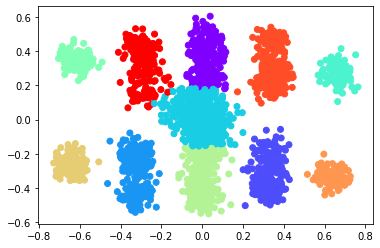

In [95]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

inf = np.array(inf)

pca = PCA(n_components=2)
inf = pca.fit_transform(inf)


kmeans = KMeans(n_clusters=11, random_state=0).fit(inf)


# visualize the clusters

plt.scatter(inf[:, 0], inf[:, 1], c=kmeans.labels_, cmap='rainbow')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black')
plt.savefig("visualize.png")
plt.show()
